In [134]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, date
import numpy as np
%matplotlib inline

In [135]:
path = "C:/PYTHON/pythonFinalProject/rawDataPythonIPL"
all_matches_df = pd.read_csv(path+"\matches.csv")
all_matches_df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [136]:
all_deliveries_df = pd.read_csv(path+"\deliveries.csv")
all_deliveries_df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


# Find the aggregate scores of teams for each match

In [137]:
all_matches_score_df = all_deliveries_df.groupby([all_deliveries_df['match_id'],
            all_deliveries_df['inning']])['total_runs'].sum().unstack().reset_index()

In [138]:
all_matches_score_df.head(1)

inning,match_id,1,2,3,4
0,1,222.0,82.0,NaN,NaN


In [139]:
all_matches_score_df = all_deliveries_df.groupby([all_deliveries_df['match_id'],all_deliveries_df['inning']])['total_runs'].sum().unstack().reset_index()
all_matches_score_df.columns = ['match_id','Team1_score','Team2_score','Team1_superover_score','Team2_superover_score']

In [140]:
all_matches_score_df.head(2)

,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score
0,1,222.0,82.0,NaN,NaN
1,2,240.0,207.0,NaN,NaN


In [141]:
all_matches_score_df.unstack().reset_index().head(2)

,level_0,level_1,0
0,match_id,0,1.0
1,match_id,1,2.0


In [142]:
all_matches_score_df.head(2)

,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score
0,1,222.0,82.0,NaN,NaN
1,2,240.0,207.0,NaN,NaN


# Merge the team scores for each match with the matches, so adding new columns to the all matches data

In [143]:
all_matches_aggregate_df = pd.merge(all_matches_df, all_matches_score_df, left_on='id', right_on= 'match_id', how='outer')

In [144]:
all_matches_aggregate_df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,222.0,82.0,NaN,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2,240.0,207.0,NaN,NaN


# Identifying the matches amongst 5 categories, Pre-Qualifier, Qualifier-1, Eliminator, Qualifier-2 & Final

In [145]:
all_matches_df["match-type"] = "Pre-Qualifier"

In [146]:
all_matches_df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match-type
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,Pre-Qualifier
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,Pre-Qualifier


In [147]:
all_matches_df[all_matches_df["season"] == 2008][-1:].index.values[0]

57

In [148]:
for year in range(2008,2017):
    fourth_last_match_in_each_season = all_matches_df[all_matches_df["season"] == year][-4:].index.values[0]
    third_last_match_in_each_season = fourth_last_match_in_each_season + 1
    second_last_match_in_each_season = third_last_match_in_each_season + 1
    last_match_in_each_season = second_last_match_in_each_season + 1
    
    all_matches_df = all_matches_df.set_value(fourth_last_match_in_each_season, "match-type" , "Qualifier-1")
    all_matches_df = all_matches_df.set_value(third_last_match_in_each_season, "match-type" , "Eliminator")
    all_matches_df = all_matches_df.set_value(second_last_match_in_each_season, "match-type" , "Qualifier-2")
    all_matches_df = all_matches_df.set_value(last_match_in_each_season, "match-type" , "Final")
    

In [149]:
all_matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match-type
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,Pre-Qualifier
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,Pre-Qualifier
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,Pre-Qualifier
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,Pre-Qualifier
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,Pre-Qualifier
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,Pre-Qualifier
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN,Pre-Qualifier
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,Pre-Qualifier
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN,Pre-Qualifier
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN,Pre-Qualifier


In [150]:
all_matches_aggregate_df = pd.merge(all_matches_df, all_matches_score_df, left_on="id", right_on="match_id", how="outer")

In [151]:
all_matches_aggregate_df.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,venue,umpire1,umpire2,umpire3,match-type,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,Qualifier-2,576,162.0,163.0,NaN,NaN
576,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN,Final,577,208.0,200.0,NaN,NaN


# Adding the Total Team Extras score for each match, inning

In [152]:
total_team_extras_df = all_deliveries_df.groupby(['match_id', 'inning'])['extra_runs'].sum().unstack().reset_index()
total_team_extras_df.columns = ['match_id', 'Team1_extras', 'Team2_extras', 'Team1_superover_extras', 'Team2_superover_extras']


In [153]:
total_team_extras_df.head(2)

,match_id,Team1_extras,Team2_extras,Team1_superover_extras,Team2_superover_extras
0,1,17.0,19.0,NaN,NaN
1,2,6.0,11.0,NaN,NaN


In [154]:
all_matches_aggregate_df = pd.merge(all_matches_aggregate_df, total_team_extras_df, on="match_id", how="outer")
all_matches_aggregate_df.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,match-type,match_id,Team1_score,Team2_score,Team1_superover_score,Team2_superover_score,Team1_extras,Team2_extras,Team1_superover_extras,Team2_superover_extras
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,Qualifier-2,576,162.0,163.0,NaN,NaN,5.0,2.0,NaN,NaN
576,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,Final,577,208.0,200.0,NaN,NaN,14.0,9.0,NaN,NaN


In [155]:
cols = ['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
 'Team1_score', 'Team2_score', 'win_by_runs', 'win_by_wickets', 'Team1_extras', 'Team2_extras', 'Team1_superover_score', 'Team2_superover_score',
 'Team1_superover_extras', 'Team2_superover_extras', 'player_of_match', 'match-type', 'venue', 'umpire1', 'umpire2', 'umpire3']
all_matches_aggregate_df = all_matches_aggregate_df[cols]

In [156]:
all_matches_aggregate_df.tail(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,match-type,venue,umpire1,umpire2,umpire3
575,576,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,NaN,NaN,NaN,NaN,DA Warner,Qualifier-2,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
576,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,NaN,NaN,NaN,NaN,BCJ Cutting,Final,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [28]:
all_matches_aggregate_df.to_csv("C:\PYTHON\pythonFinalProject\dataPreProcessing\All_Matches_Aggregates.csv")

In [184]:
all_matches_aggregate_2016_df = all_matches_aggregate_df

In [185]:
all_matches_aggregate_2016_df["season"] = 2016

In [186]:
all_matches_aggregate_2016_df.to_csv("C:\PYTHON\pythonFinalProject\dataPreProcessing/2016\All_Matches_Aggregates_2016.csv")

In [160]:
all_matches_aggregate_2008_df.tail(2)

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,match-type,venue,umpire1,umpire2,umpire3
575,576,2008,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,NaN,NaN,NaN,NaN,DA Warner,Qualifier-2,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
576,577,2008,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,NaN,NaN,NaN,NaN,BCJ Cutting,Final,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [132]:
all_matches_aggregate_df["season"]

In [133]:
all_matches_aggregate_df

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,Team1_superover_score,Team2_superover_score,Team1_superover_extras,Team2_superover_extras,player_of_match,match-type,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,NaN,NaN,NaN,BB McCullum,Pre-Qualifier,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,NaN,NaN,NaN,NaN,MEK Hussey,Pre-Qualifier,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,...,NaN,NaN,NaN,NaN,MF Maharoof,Pre-Qualifier,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,...,NaN,NaN,NaN,NaN,MV Boucher,Pre-Qualifier,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,...,NaN,NaN,NaN,NaN,DJ Hussey,Pre-Qualifier,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,...,NaN,NaN,NaN,NaN,SR Watson,Pre-Qualifier,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,...,NaN,NaN,NaN,NaN,V Sehwag,Pre-Qualifier,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,NaN,NaN,NaN,NaN,ML Hayden,Pre-Qualifier,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,...,NaN,NaN,NaN,NaN,YK Pathan,Pre-Qualifier,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,...,NaN,NaN,NaN,NaN,KC Sangakkara,Pre-Qualifier,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


In [29]:
all_matches_df.groupby("winner")["id"].count()

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               56
Gujarat Lions                   9
Kings XI Punjab                63
Kochi Tuskers Kerala            6
Kolkata Knight Riders          68
Mumbai Indians                 80
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiants         5
Royal Challengers Bangalore    70
Sunrisers Hyderabad            34
Name: id, dtype: int64

# ANALYSIS 3a : Team which handle their nerves under pressure

In [30]:
close_matches_df = all_matches_df[((all_matches_df['win_by_runs']<10) & (all_matches_df['win_by_runs']>0)) 
                                  | ((all_matches_df['win_by_wickets']<=2) & (all_matches_df['win_by_wickets']>0))]

In [31]:
close_matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match-type
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,Pre-Qualifier
21,22,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN,Pre-Qualifier
28,29,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly,Eden Gardens,Asad Rauf,IL Howell,NaN,Pre-Qualifier
40,41,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN,Pre-Qualifier
43,44,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN,Pre-Qualifier
46,47,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium,BF Bowden,GA Pratapkumar,NaN,Pre-Qualifier
51,52,2008,Bangalore,2008-05-03,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Royal Challengers Bangalore,3,0,P Kumar,M Chinnaswamy Stadium,BR Doctrove,SL Shastri,NaN,Pre-Qualifier
65,66,2009,Durban,2009-04-23,Delhi Daredevils,Chennai Super Kings,Delhi Daredevils,bat,normal,0,Delhi Daredevils,9,0,AB de Villiers,Kingsmead,BR Doctrove,SJA Taufel,NaN,Pre-Qualifier
75,76,2009,Durban,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead,MR Benson,SL Shastri,NaN,Pre-Qualifier
78,79,2009,East London,2009-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore,NaN,Pre-Qualifier


In [32]:
close_matches_df.groupby("winner")["id"].count()

winner
Chennai Super Kings             6
Deccan Chargers                 3
Delhi Daredevils                3
Gujarat Lions                   1
Kings XI Punjab                10
Kochi Tuskers Kerala            1
Kolkata Knight Riders           7
Mumbai Indians                  9
Pune Warriors                   1
Rajasthan Royals                4
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
Name: id, dtype: int64

In [34]:
close_matches_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_3_Team_Wins\Analysis_3_Team_Wins_Under_Pressure\output\Teams_Winning_Close_Matches.csv")

C:\Users\Harshil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


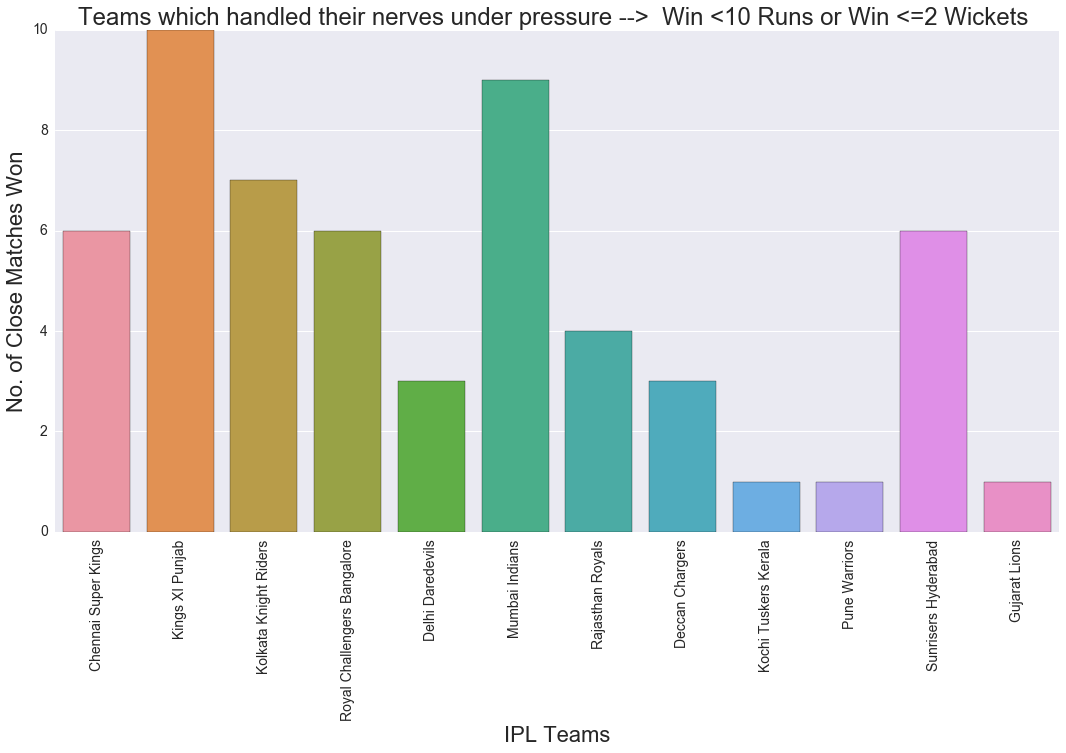

In [35]:
plt.subplots(figsize=(18,9))
sns.set_style("whitegrid")
ax = sns.countplot(x='winner', data=close_matches_df)
ax.set_title("Teams which handled their nerves under pressure -->  Win <10 Runs or Win <=2 Wickets ")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Teams")
ax.set_ylabel("No. of Close Matches Won")
ax.legend(fontsize= 18, loc="best")
ax.xaxis.get_label().set_fontsize(22)
ax.yaxis.get_label().set_fontsize(22)
ax.title.set_fontsize(24)
plt.xticks(rotation='vertical')
ax.tick_params(axis='x', which='major',labelsize=14)
ax.tick_params(axis='y', which='major',labelsize=14)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_3_Team_Wins\Analysis_3_Team_Wins_Under_Pressure\output\Team_Winning_Close_Matches.png", bbox_inches='tight')

# ANALYSIS 3b: No. of times, Teams dominated their opposition with big victories

In [36]:
big_margin_victories_df = all_matches_df[((all_matches_df['win_by_runs']>=50) | (all_matches_df['win_by_wickets']>=7))]

In [37]:
big_margin_victories_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match-type
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,Pre-Qualifier
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,Pre-Qualifier
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN,Pre-Qualifier
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN,Pre-Qualifier
10,11,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN,Pre-Qualifier
11,12,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN,Pre-Qualifier
12,13,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN,Pre-Qualifier
15,16,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN,Pre-Qualifier
17,18,2008,Hyderabad,2008-05-01,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,SE Marsh,"Rajiv Gandhi International Stadium, Uppal",BR Doctrove,RB Tiffin,NaN,Pre-Qualifier
19,20,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Delhi Daredevils,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN,Pre-Qualifier


In [38]:
big_margin_victories_df.groupby("winner")["id"].count()

winner
Chennai Super Kings            27
Deccan Chargers                 7
Delhi Daredevils               20
Gujarat Lions                   1
Kings XI Punjab                18
Kochi Tuskers Kerala            4
Kolkata Knight Riders          20
Mumbai Indians                 25
Pune Warriors                   3
Rajasthan Royals               23
Rising Pune Supergiants         2
Royal Challengers Bangalore    29
Sunrisers Hyderabad             8
Name: id, dtype: int64

In [39]:
big_margin_victories_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_3_Team_Wins\Analysis_3_Team_Wins_Big_Margins\output\Teams_Winning_Big_Margin.csv")

C:\Users\Harshil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


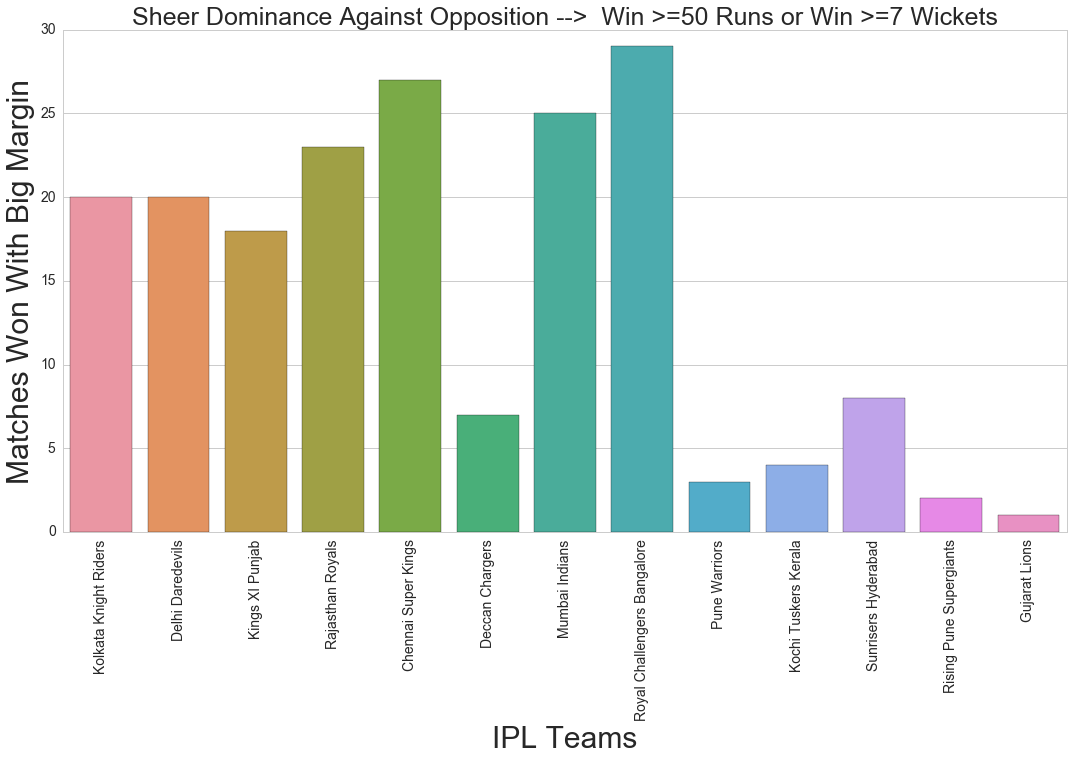

In [40]:
plt.subplots(figsize=(18,9))
sns.set_style("whitegrid")
ax = sns.countplot(x='winner', data=big_margin_victories_df)
ax.set_title("Sheer Dominance Against Opposition -->  Win >=50 Runs or Win >=7 Wickets")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Teams")
ax.set_ylabel("Matches Won With Big Margin")
ax.legend(fontsize= 18, loc="best")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
ax.title.set_fontsize(25)
plt.xticks(rotation='vertical')
ax.tick_params(axis='x', which='major',labelsize=14)
ax.tick_params(axis='y', which='major',labelsize=14)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_3_Team_Wins\Analysis_3_Team_Wins_Big_Margins\output\Team_Winning_Big_Margins.png", bbox_inches='tight')

# ANALYSIS 1: Team Wins in different Cities in various IPL Seasons

In [47]:
total_wins_per_city_df = all_matches_aggregate_df[all_matches_aggregate_df['season'] == 2008].groupby(['winner',
                        'city'])['match_id'].count().unstack()
total_wins_per_city_df.head(10)

city,Bangalore,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai
winner,,,,,,,,
Chennai Super Kings,1.0,1.0,3.0,1.0,1.0,NaN,1.0,1.0
Deccan Chargers,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
Delhi Daredevils,1.0,NaN,1.0,4.0,1.0,NaN,NaN,NaN
Kings XI Punjab,1.0,6.0,NaN,1.0,1.0,NaN,NaN,1.0
Kolkata Knight Riders,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN
Mumbai Indians,1.0,NaN,NaN,NaN,1.0,NaN,1.0,4.0
Rajasthan Royals,1.0,NaN,1.0,NaN,1.0,7.0,1.0,2.0
Royal Challengers Bangalore,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0


In [42]:
start_season = input("Please enter the start season you want to search:")

Please enter the start season you want to search:2008


In [43]:
end_season = input("Please enter the end season you want to search:")

Please enter the end season you want to search:2009


In [30]:
str(start_season)

'2008'

In [51]:
total_wins_per_city_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_1_Venue\output\Total_Wins_Per_City.csv")

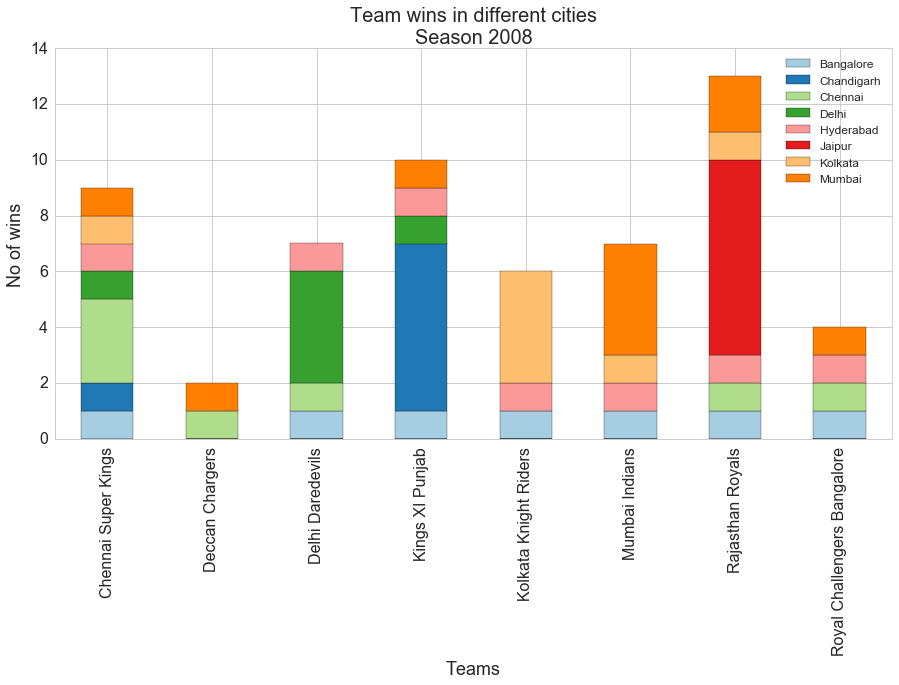

In [52]:
x, y = int(start_season), int(end_season)

while x<y:
    total_wins_per_city_df = all_matches_aggregate_df[all_matches_aggregate_df['season'] == x].groupby(['winner', 'city'])['match_id'].count().unstack()
    plot = total_wins_per_city_df.plot(kind='bar', stacked=True, figsize=(15, 7), fontsize=16)
    sns.set_palette("Paired", len(all_matches_aggregate_df['city'].unique()))
    plot.set_title("Team wins in different cities\nSeason "+str(x) , fontsize=20)
    plot.set_xlabel("Teams", fontsize=18)
    plot.set_ylabel("No of wins",fontsize=18)
    plot.legend(loc='best', prop={'size':12})
    x +=1
    plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_1_Venue\output\Total_Wins_Per_City.png", bbox_inches='tight')

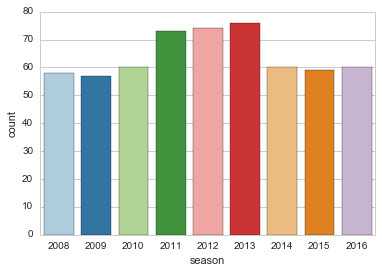

In [195]:
sns.countplot(x='season', data=all_matches_df)
plt.show()

# BATSMEN Aggregates in terms of runs, strike rate, more than 30, more than 50, 4s, 6s, dismissal kind, fielder across various matches

In [53]:
group_batsman_df = all_deliveries_df.groupby(["match_id", "inning", "batting_team", "batsman"])
group_batsman_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
13,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
34,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,6,3,RT Ponting,BB McCullum,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
35,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,6,4,RT Ponting,BB McCullum,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
82,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,14,2,DJ Hussey,BB McCullum,SB Joshi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
83,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,14,3,DJ Hussey,BB McCullum,SB Joshi,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
108,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,3,Mohammad Hafeez,BB McCullum,AA Noffke,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
109,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,4,Mohammad Hafeez,BB McCullum,AA Noffke,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [54]:
batsman_df = group_batsman_df["batsman_runs"].sum().reset_index()
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Kolkata Knight Riders,BB McCullum,158
1,1,1,Kolkata Knight Riders,DJ Hussey,12


In [55]:
balls_faced_by_batsman_df = all_deliveries_df[all_deliveries_df["wide_runs"]==0]
balls_faced_by_batsman_df.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
136596,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
136597,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [56]:
balls_faced_by_batsman_df = balls_faced_by_batsman_df.groupby(["match_id", "inning",
"batsman"])["batsman_runs"].count().reset_index()


In [57]:
balls_faced_by_batsman_df.head(2)

,match_id,inning,batsman,batsman_runs
0,1,1,BB McCullum,73
1,1,1,DJ Hussey,12


In [58]:
balls_faced_by_batsman_df.columns = ["match_id", "inning", "batsman", "balls_faced"]

In [59]:
batsman_df = pd.merge(batsman_df, balls_faced_by_batsman_df, left_on=["match_id", "inning", "batsman"],
right_on=["match_id", "inning", "batsman"], how="left")

In [60]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0


In [61]:
batsman_df["Strike-Rate"] = np.round(batsman_df["batsman_runs"]/ batsman_df["balls_faced"] *100 , 2)

In [62]:
batsman_df["More-Than-30"] = 0
batsman_df["More-Than-50"] = 0
batsman_df["More-Than-100"] = 0

In [63]:
batsman_df.ix[batsman_df.ix[:,"batsman_runs"] >= 30, "More-Than-30"] = 1
batsman_df.ix[batsman_df.ix[:,"batsman_runs"] >= 50, "More-Than-50"] = 1
batsman_df.ix[batsman_df.ix[:,"batsman_runs"] >= 100, "More-Than-100"] = 1

In [64]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,216.44,1,1,1
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,100.00,0,0,0


In [65]:
four_runs_scored_df = all_deliveries_df[all_deliveries_df["batsman_runs"] == 4]
six_runs_scored_df = all_deliveries_df[all_deliveries_df["batsman_runs"] == 6]
four_runs_scored_df.head(1)
six_runs_scored_df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,4,BB McCullum,SC Ganguly,Z Khan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [66]:
fours_scored_per_batsman_df = four_runs_scored_df.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_scored_per_batsman_df = six_runs_scored_df.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_scored_per_batsman_df.head(1)

,match_id,inning,batsman,batsman_runs
0,1,1,BB McCullum,10


In [67]:
sixes_scored_per_batsman_df.head(1)

,match_id,inning,batsman,batsman_runs
0,1,1,BB McCullum,13


In [68]:
fours_scored_per_batsman_df.columns = ["match_id", "inning", "batsman", "4s"]
sixes_scored_per_batsman_df.columns = ["match_id", "inning", "batsman", "6s"]

In [69]:
fours_scored_per_batsman_df.head(1)

,match_id,inning,batsman,4s
0,1,1,BB McCullum,10


In [70]:
sixes_scored_per_batsman_df.head(1)

,match_id,inning,batsman,6s
0,1,1,BB McCullum,13


In [71]:
batsman_df = batsman_df.merge(fours_scored_per_batsman_df, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsman_df = batsman_df.merge(sixes_scored_per_batsman_df, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [72]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,216.44,1,1,1,10.0,13.0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,100.00,0,0,0,1.0,NaN


In [73]:
for col in ["batsman_runs", "4s", "6s", "balls_faced", "Strike-Rate","More-Than-30","More-Than-50","More-Than-100"]:
    batsman_df[col] = batsman_df[col].fillna(0)

In [74]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,216.44,1,1,1,10.0,13.0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,100.00,0,0,0,1.0,0.0


In [75]:
player_dismissals_df = all_deliveries_df[pd.notnull(all_deliveries_df["player_dismissed"])]

In [76]:
player_dismissals_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
33,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,6,2,SC Ganguly,BB McCullum,Z Khan,0,...,0,0,0,0,0,0,0,SC Ganguly,caught,JH Kallis
74,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,13,1,RT Ponting,BB McCullum,JH Kallis,0,...,0,0,0,0,0,0,0,RT Ponting,caught,P Kumar


In [77]:
player_dismissals_df = player_dismissals_df[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]

In [78]:
player_dismissals_df.head(2)

,match_id,inning,player_dismissed,dismissal_kind,fielder
33,1,1,SC Ganguly,caught,JH Kallis
74,1,1,RT Ponting,caught,P Kumar


In [79]:
player_dismissals_df.rename(columns={"player_dismissed": "batsman"}, inplace=True)

In [80]:
player_dismissals_df.head(2)

,match_id,inning,batsman,dismissal_kind,fielder
33,1,1,SC Ganguly,caught,JH Kallis
74,1,1,RT Ponting,caught,P Kumar


In [81]:
batsman_df = batsman_df.merge(player_dismissals_df, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [82]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,216.44,1,1,1,10.0,13.0,NaN,NaN
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,100.00,0,0,0,1.0,0.0,caught,CL White


In [83]:
for col in ["batsman_runs", "4s", "6s", "balls_faced", "Strike-Rate","More-Than-30","More-Than-50","More-Than-100","4s","6s","dismissal_kind","fielder"]:
    batsman_df[col] = batsman_df[col].fillna(0)

In [84]:
batsman_df.head(2)

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,BB McCullum,158,73.0,216.44,1,1,1,10.0,13.0,0,0
1,1,1,Kolkata Knight Riders,DJ Hussey,12,12.0,100.00,0,0,0,1.0,0.0,caught,CL White


In [85]:
batsman_df = all_matches_df[['id','season']].merge(batsman_df, left_on = 'id', 
                right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [86]:
batsman_df.tail(2)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s,dismissal_kind,fielder
8643,2016,577,2,Royal Challengers Bangalore,Sachin Baby,18,10.0,180.00,0,0,0,1.0,1.0,0,0
8644,2016,577,2,Royal Challengers Bangalore,V Kohli,54,35.0,154.29,1,1,0,5.0,2.0,bowled,0


In [88]:
batsman_df.to_csv("C:\PYTHON\pythonFinalProject\dataPreProcessing\Batsman_Aggregates.csv")

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')

args = parser.parse_args()
print(args.accumulate(args.integers))

# ANALYSIS 5: Players Comparison By Runs

In [89]:
inputstring = input("Please enter player 1 name : ")
inputstring1 = input("Please enter player 2 name : ")

Please enter player 1 name : V Kohli
Please enter player 2 name : CH Gayle


In [90]:
for i in [inputstring1, inputstring]:
    new_df = batsman_df.ix[batsman_df.ix[:,"batsman"].str.contains(str(i))]


In [91]:
new_df.tail(2)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s,dismissal_kind,fielder
8591,2016,574,2,Royal Challengers Bangalore,V Kohli,0,2.0,0.00,0,0,0,0.0,0.0,bowled,0
8644,2016,577,2,Royal Challengers Bangalore,V Kohli,54,35.0,154.29,1,1,0,5.0,2.0,bowled,0


In [135]:
inputstring

'V Kohli'

In [92]:
player_comparison_df = batsman_df.ix[batsman_df.ix[:,"batsman"].str.contains(str(inputstring)) | batsman_df.ix[:,"batsman"].str.contains(str(inputstring1))]

In [93]:
player_comparison_df

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,Strike-Rate,More-Than-30,More-Than-50,More-Than-100,4s,6s,dismissal_kind,fielder
13,2008,1,2,Royal Challengers Bangalore,V Kohli,1,5.0,20.00,0,0,0,0.0,0.0,bowled,0
56,2008,4,2,Royal Challengers Bangalore,V Kohli,23,14.0,164.29,0,0,0,3.0,1.0,caught,L Ronchi
164,2008,11,1,Royal Challengers Bangalore,V Kohli,13,14.0,92.86,0,0,0,0.0,1.0,caught,M Rawat
224,2008,15,2,Royal Challengers Bangalore,V Kohli,12,7.0,171.43,0,0,0,2.0,0.0,bowled,0
253,2008,17,2,Royal Challengers Bangalore,V Kohli,1,1.0,100.00,0,0,0,0.0,0.0,0,0
315,2008,21,2,Royal Challengers Bangalore,V Kohli,9,5.0,180.00,0,0,0,2.0,0.0,caught,DB Ravi Teja
376,2008,25,1,Royal Challengers Bangalore,V Kohli,34,36.0,94.44,1,0,0,5.0,0.0,caught,S Sreesanth
467,2008,31,1,Royal Challengers Bangalore,V Kohli,0,1.0,0.00,0,0,0,0.0,0.0,caught,YV Takawale
528,2008,35,1,Royal Challengers Bangalore,V Kohli,21,22.0,95.45,0,0,0,4.0,0.0,bowled,0
629,2008,42,2,Royal Challengers Bangalore,V Kohli,3,7.0,42.86,0,0,0,0.0,0.0,bowled,0


In [98]:
player_comparison_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison.csv")

In [94]:
players_comparison_by_runs_df = player_comparison_df.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

In [95]:
players_comparison_by_runs_df

,season,batting_team,batsman,batsman_runs
0,2008,Royal Challengers Bangalore,V Kohli,165
1,2009,Kolkata Knight Riders,CH Gayle,184
2,2009,Royal Challengers Bangalore,V Kohli,246
3,2010,Kolkata Knight Riders,CH Gayle,292
4,2010,Royal Challengers Bangalore,V Kohli,307
5,2011,Royal Challengers Bangalore,CH Gayle,608
6,2011,Royal Challengers Bangalore,V Kohli,557
7,2012,Royal Challengers Bangalore,CH Gayle,733
8,2012,Royal Challengers Bangalore,V Kohli,364
9,2013,Royal Challengers Bangalore,CH Gayle,720


In [99]:
players_comparison_by_runs_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Runs.csv")

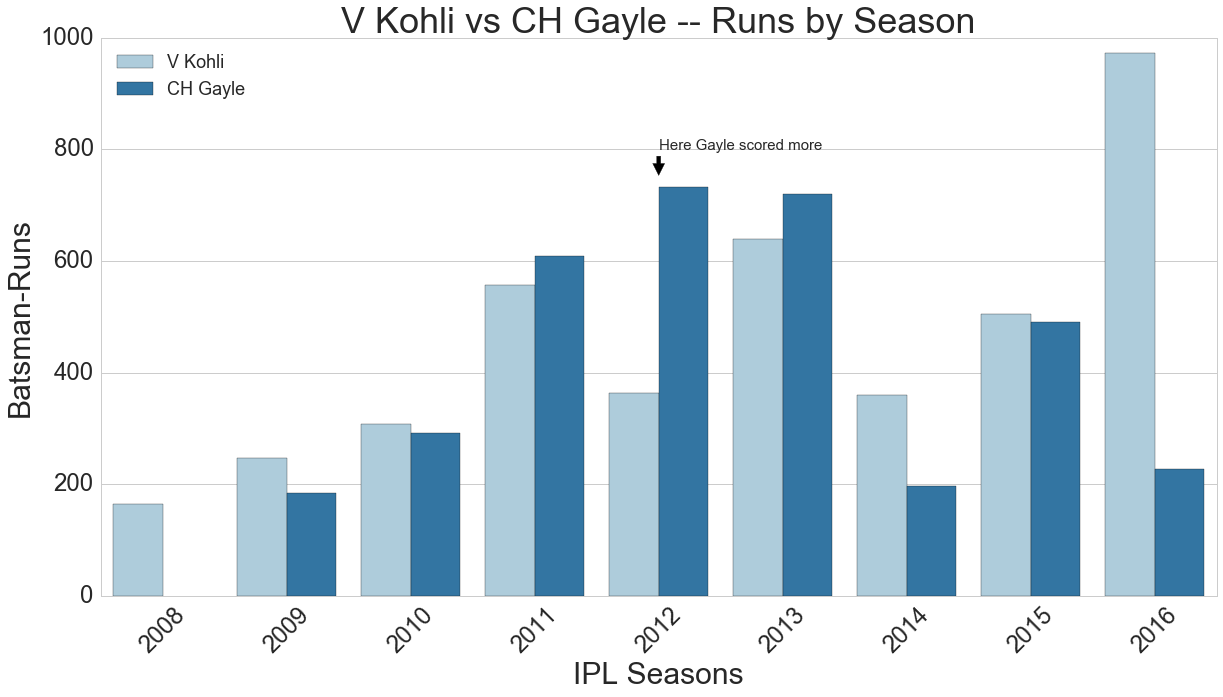

In [101]:
plt.subplots(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="season", y="batsman_runs", hue="batsman", data=players_comparison_by_runs_df)
ax.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Runs by Season")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Seasons")
ax.set_ylabel("Batsman-Runs")
ax.legend(fontsize= 18, loc="upper left")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
ax.title.set_fontsize(36)
ax.tick_params(axis='x', which='major',labelsize=24)
ax.tick_params(axis='y', which='major',labelsize=24)
ax.annotate('Here Gayle scored more', fontsize=15, xy=(4, 750), xytext=(4, 800),arrowprops=dict(facecolor='black', shrink=0.07))
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Runs.png", bbox_inches='tight')

#ax.annotate('Here Gayle scored more', xy=(4, 800), xytext=(4,825), size=15,arrowprops=dict(arrowstyle="fancy",
#fc="0.6", ec="none", connectionstyle="angle3,angleA=0,angleB=-90"),)

#ax.annotate('simple', xy=(2., -1), xycoords='data',
#                xytext=(100, 60), textcoords='offset points',
#                size=20,
#                arrowprops=dict(arrowstyle="simple",
#                                fc="0.6", ec="none",
#                                patchB=el,
#                                connectionstyle="arc3,rad=0.3"),
#               )


#plt.savefig("Virat_vs_Gayle_Runs_By_IPL_Seasons.png")

In [103]:
players_comparison_by_balls_faced_df = player_comparison_df.groupby(['season', 'batting_team', 'batsman'])['balls_faced'].sum().reset_index()

In [104]:
players_comparison_by_balls_faced_df

,season,batting_team,batsman,balls_faced
0,2008,Royal Challengers Bangalore,V Kohli,157.0
1,2009,Kolkata Knight Riders,CH Gayle,148.0
2,2009,Royal Challengers Bangalore,V Kohli,219.0
3,2010,Kolkata Knight Riders,CH Gayle,184.0
4,2010,Royal Challengers Bangalore,V Kohli,212.0
5,2011,Royal Challengers Bangalore,CH Gayle,332.0
6,2011,Royal Challengers Bangalore,V Kohli,460.0
7,2012,Royal Challengers Bangalore,CH Gayle,456.0
8,2012,Royal Challengers Bangalore,V Kohli,326.0
9,2013,Royal Challengers Bangalore,CH Gayle,459.0


In [105]:
players_comparison_by_balls_faced_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Balls_Faced.csv")

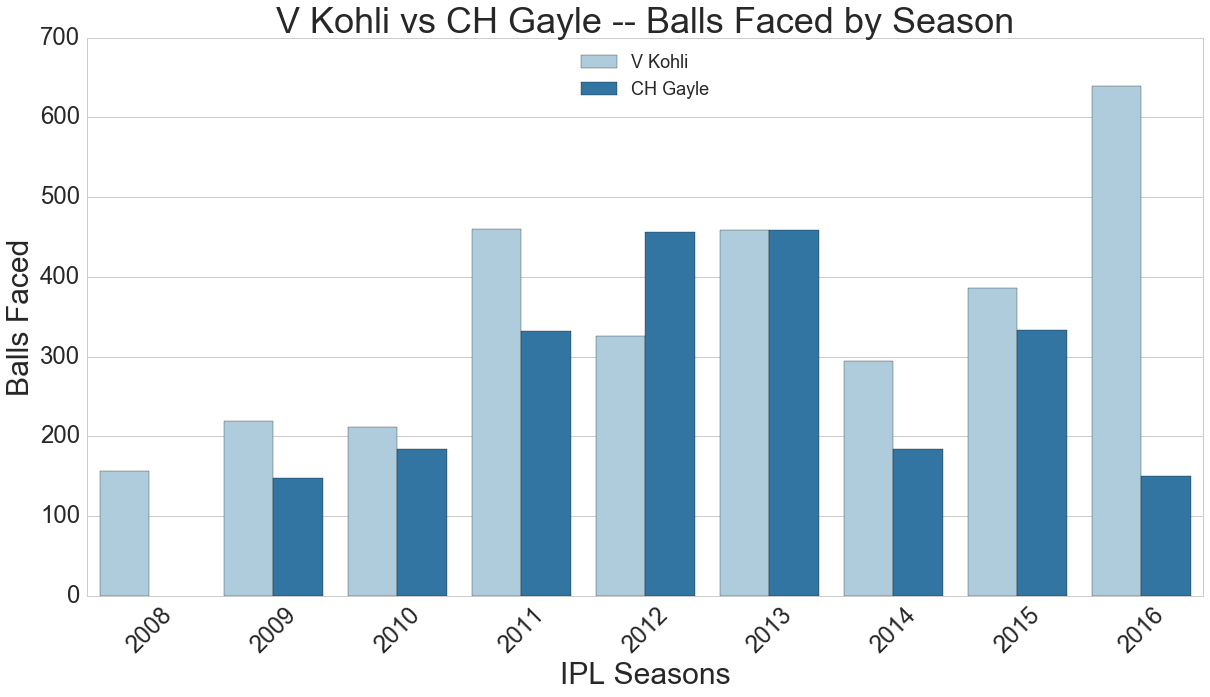

In [106]:
plt.subplots(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="season", y="balls_faced", hue="batsman", data=players_comparison_by_balls_faced_df)
ax.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Balls Faced by Season")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Seasons")
ax.set_ylabel("Balls Faced")
ax.legend(fontsize= 18, loc="best")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
ax.title.set_fontsize(36)
ax.tick_params(axis='x', which='major',labelsize=24)
ax.tick_params(axis='y', which='major',labelsize=24)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Balls_Faced.png", bbox_inches='tight')
#plt.savefig("Virat_vs_Gayle_Runs_By_IPL_Seasons.png")

In [107]:
players_comparison_by_strike_rate_df = player_comparison_df.groupby(['season', 'batting_team', 'batsman'])['Strike-Rate'].mean().reset_index()

In [108]:
players_comparison_by_strike_rate_df

,season,batting_team,batsman,Strike-Rate
0,2008,Royal Challengers Bangalore,V Kohli,96.238333
1,2009,Kolkata Knight Riders,CH Gayle,131.750000
2,2009,Royal Challengers Bangalore,V Kohli,108.983077
3,2010,Kolkata Knight Riders,CH Gayle,138.148889
4,2010,Royal Challengers Bangalore,V Kohli,129.442308
5,2011,Royal Challengers Bangalore,CH Gayle,163.083333
6,2011,Royal Challengers Bangalore,V Kohli,113.634375
7,2012,Royal Challengers Bangalore,CH Gayle,142.292857
8,2012,Royal Challengers Bangalore,V Kohli,115.788000
9,2013,Royal Challengers Bangalore,CH Gayle,137.392222


In [109]:
players_comparison_by_strike_rate_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Strike_Rate.csv")

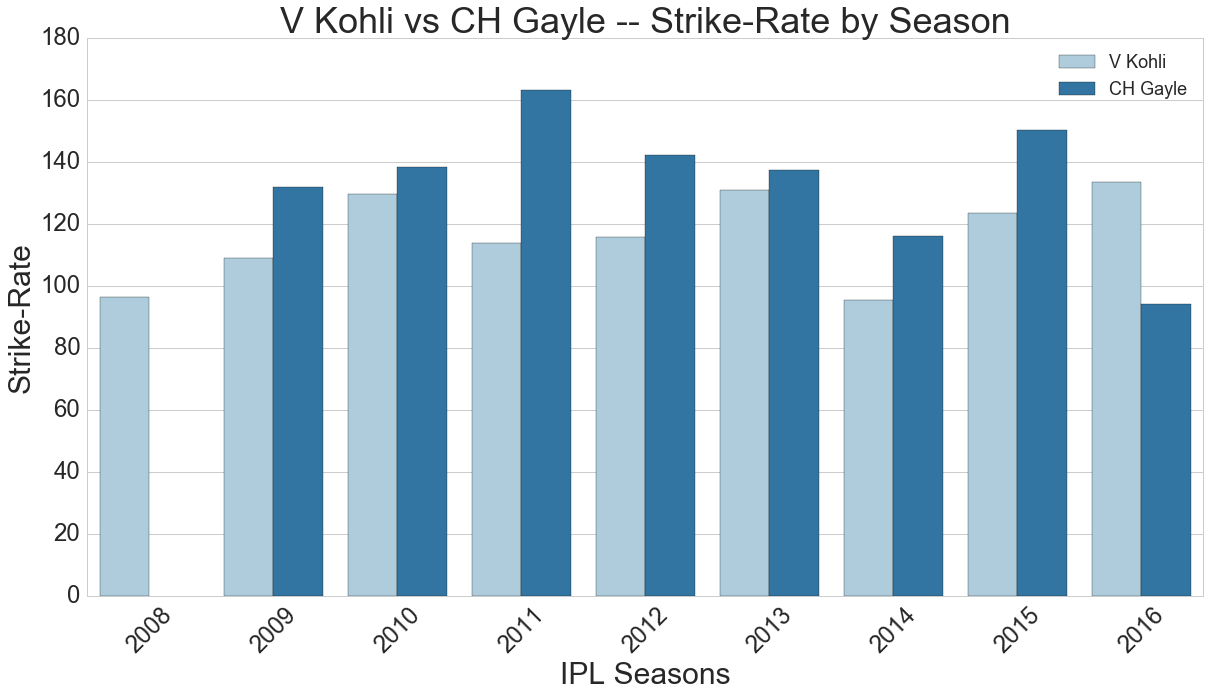

In [123]:
plt.subplots(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="season", y="Strike-Rate", hue="batsman", data=players_comparison_by_strike_rate_df)
ax.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Strike-Rate by Season")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=45)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Seasons")
ax.set_ylabel("Strike-Rate")
ax.legend(fontsize= 18, loc="best")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)
ax.title.set_fontsize(36)
ax.tick_params(axis='x', which='major',labelsize=24)
ax.tick_params(axis='y', which='major',labelsize=24)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_5_Player_Comparison\output\Players_Comparison_By_Strike_Rate.png")

# ANALYSIS 4: Top 5 Batsman across various seasons of IPL

In [111]:
batsman_runs_per_season_df = batsman_df.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

In [112]:
batsman_runs_per_season_df = batsman_runs_per_season_df.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T

In [113]:
batsman_runs_per_season_df['Total'] = batsman_runs_per_season_df.sum(axis=1)

In [114]:
batsman_runs_per_season_df = batsman_runs_per_season_df.sort_values(by = 'Total', ascending = False).drop('Total', 1)

In [115]:
batsman_runs_per_season_df.head(2)

season,2008,2009,2010,2011,2012,2013,2014,2015,2016
batsman,,,,,,,,,
V Kohli,165.0,246.0,307.0,557.0,364.0,639.0,359.0,505.0,973.0
SK Raina,421.0,434.0,528.0,438.0,441.0,548.0,523.0,374.0,399.0


In [273]:
#batsman_runsperseason = batsman_df.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

#batsman_runsperseason = batsman_runsperseason.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T
#batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
#batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
#plt.subplots(figsize=(20,10))

#batsman_runsperseason.T

#plt.figure(figsize=(15,10))
#sns.set_style("whitegrid")    # Set style for seaborn output
#sns.set_context("notebook", font_scale=2)
#sns.line(x="date", y="hours", data=batsman_runsperseason)
#sns.pointplot(x="season", y="batsman", data=batsman_runsperseason)

#plt.xlabel("date")
#plt.ylabel("HOURS")
#plt.suptitle("date vs time", y=1.05, fontsize=32)
#plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
#plt.xticks(rotation=60)
#plt.savefig("F:/Python_Project/complaintspermonth.png", bbox_inches='tight')



#ax = batsman_runsperseason[:5].T.plot()







In [116]:
batsman_runs_per_season_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_4_Top_5_Batsman\output\Batsman_Runs_Per_Season.csv")

In [117]:
fin_df = batsman_runs_per_season_df.T

In [118]:
top5 = ['V Kohli', 'SK Raina', 'RG Sharma', 'G Gambhir', 'CH Gayle']
all_df = []
for bat in top5:
    temp_df = fin_df[[bat]].reset_index()
    temp_df = temp_df[['season',bat]]
    temp_df = temp_df.rename(columns={bat:'score'})
    temp_df['batsman_name'] = bat
    all_df.append(temp_df)
final_df = pd.concat(all_df)

In [119]:
final_df.head(2)

batsman,season,score,batsman_name
0,2008,165.0,V Kohli
1,2009,246.0,V Kohli


In [120]:
final_df.to_csv("C:\PYTHON\pythonFinalProject\Analysis_4_Top_5_Batsman\output\Top_5_Batsman_Runs_Per_Season.csv")

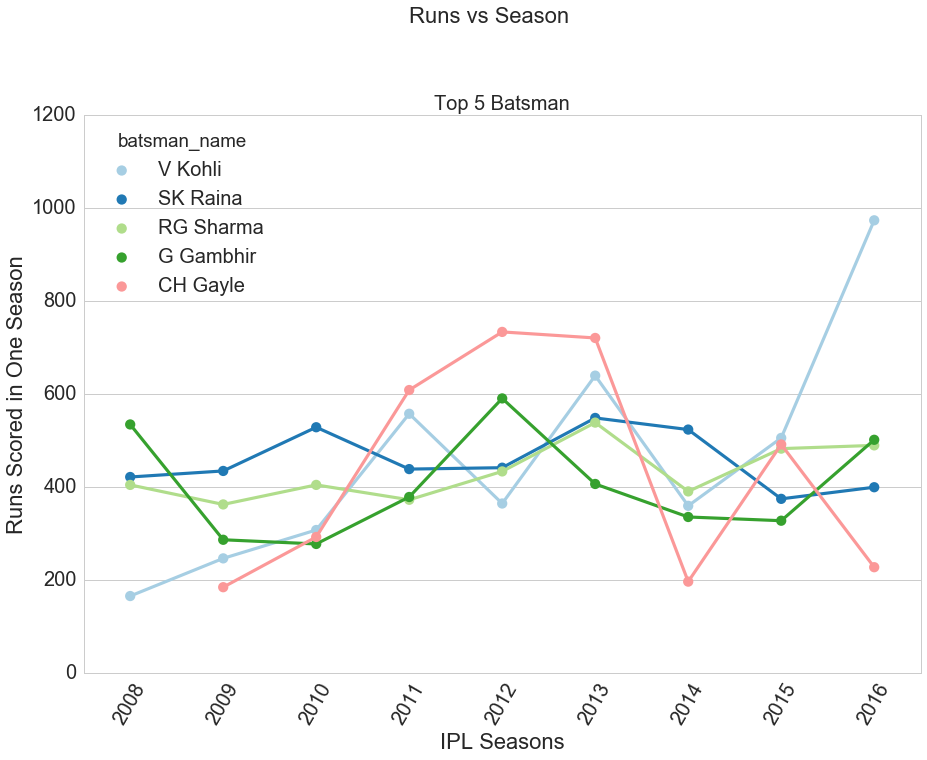

In [122]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
#sns.line(x="date", y="hours", data=batsman_runsperseason)
sns.pointplot(x="season", y="score", hue ="batsman_name", data=final_df)

plt.xlabel("IPL Seasons")
plt.ylabel("Runs Scored in One Season")
plt.suptitle("Runs vs Season", y=1.05, fontsize=22)
plt.title("Top 5 Batsman", fontsize=20)
plt.xticks(rotation=60)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_4_Top_5_Batsman\output\Top_5_Batsman_Runs_Per_Season.png")

# ANALYSIS 2: Toss Decision & Impact in IPL across seasons for various teams

In [124]:
toss_decisions = all_matches_df["toss_decision"].value_counts()

In [125]:
toss_decisions

field    315
bat      262
Name: toss_decision, dtype: int64

In [126]:
toss_decisions.index

Index(['field', 'bat'], dtype='object')

In [127]:
toss_labels = (np.array(toss_decisions.index))
toss_percentage = (np.array((toss_decisions/toss_decisions.sum())*100))
toss_percentage

array([ 54.59272097,  45.40727903])

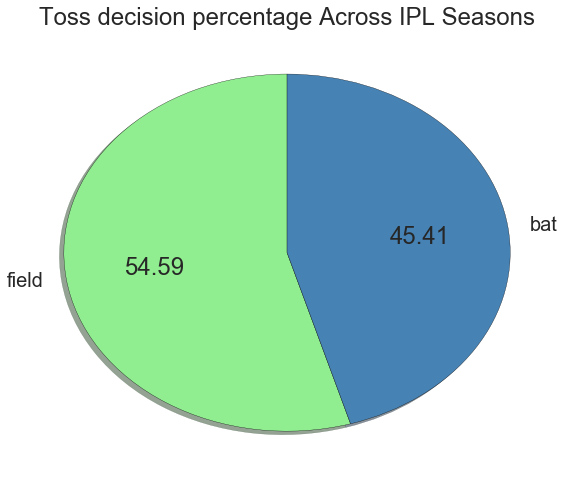

In [128]:
plt.figure(figsize=(10,8))
colors = ["lightgreen", "steelblue"]
plt.pie(toss_percentage, labels=toss_labels, autopct='%.2f',colors = colors, shadow = True,startangle=90)
plt.title("Toss decision percentage Across IPL Seasons")
plt.show()
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_2_Toss\output\Toss_Decision_Percentage.png")

C:\Users\Harshil\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


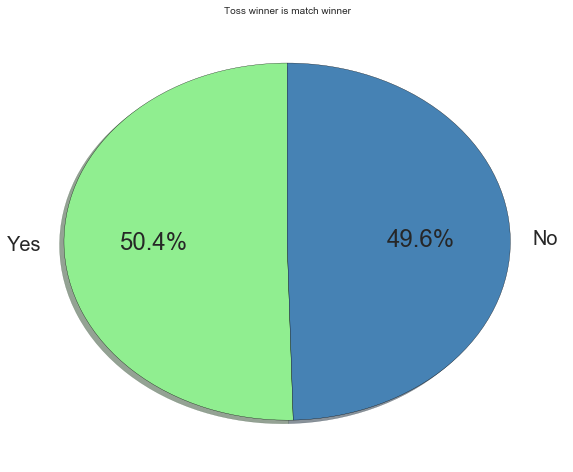

In [130]:
all_matches_df['Toss_Winner_Wins'] = 'No'
all_matches_df['Toss_Winner_Wins'].ix[all_matches_df.toss_winner == all_matches_df.winner] = 'Yes'

toss_winner_series = all_matches_df.Toss_Winner_Wins.value_counts()

labels = (np.array(toss_winner_series.index))
sizes = (np.array((toss_winner_series / toss_winner_series.sum())*100))
plt.figure(figsize=(10,8))
colors = ['lightgreen', 'steelblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner", size =10)
plt.show()
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_2_Toss\output\Toss_Winner_Is_Match_Winner_Percentage.png")

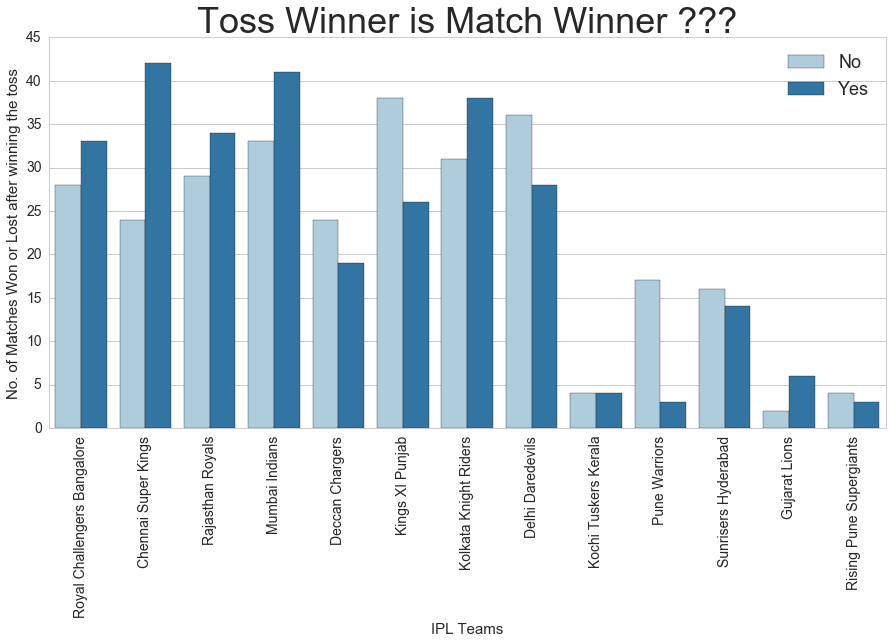

In [131]:
#plt.figure(figsize=(20,10))
#sns.countplot(x='toss_winner', hue="Toss_Winner_Wins", data = all_matches_df) 
#plt.xticks(rotation=90)
#plt.show()



plt.subplots(figsize=(15,7))
sns.set_style("whitegrid")
ax = sns.countplot(x='toss_winner', hue="Toss_Winner_Wins", data = all_matches_df)
ax.set_title("Toss Winner is Match Winner ???")
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
#sns.set(font_scale = 1)
ax.set_xlabel("IPL Teams")
ax.set_ylabel("No. of Matches Won or Lost after winning the toss")
ax.legend(fontsize= 18, loc="best")
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(36)
ax.tick_params(axis='x', which='major',labelsize=14)
ax.tick_params(axis='y', which='major',labelsize=14)
plt.savefig("C:\PYTHON\pythonFinalProject\Analysis_2_Toss\output\Toss_Winner_Is_Match_Winner_For_Teams.png")
#plt.savefig("Virat_vs_Gayle_Runs_By_IPL_Seasons.png")

